# Session 14: Gradient Descent for Multivariate Linear Regression

In this session, we will:
1. Learn the basics of **NumPy** for numerical computing
2. Understand **gradient descent** optimization
3. Implement **multivariate linear regression** from scratch

---
## Part 1: Introduction to NumPy

NumPy is the fundamental package for numerical computing in Python. It provides:
- N-dimensional arrays (`ndarray`)
- Broadcasting for element-wise operations
- Linear algebra operations
- Mathematical functions optimized for arrays

In [2]:
import numpy as np

alias

### 1.1 Creating Arrays

In [6]:
# From Python lists
arr1 = np.array([-1, 2, 3, 4, 5], dtype=np.int8)
print(f"1D array: {arr1}")
print(f"Shape: {arr1.shape}")
print(f"Dtype: {arr1.dtype}")

1D array: [-1  2  3  4  5]
Shape: (5,)
Dtype: int8


In [7]:
# 2D array (matrix)
arr2 = np.array([[1, 2, 3], 
                 [4, 5, 6]])
print(f"2D array:\n{arr2}")
print(f"Shape: {arr2.shape}")  # (rows, columns)

2D array:
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)


In [11]:
# Common array creation functions
zeros = np.zeros((3, 4))       # 3x4 matrix of zeros
ones = np.ones((2, 3))         # 2x3 matrix of ones
random = np.random.randn(3, 3) # 3x3 matrix of random values (normal distribution)
arange = np.arange(0, 10, 2)   # [0, 2, 4, 6, 8]
linspace = np.linspace(0, 1, 5) # 5 evenly spaced values from 0 to 1

print(f"zeros:\n{zeros}\n")
print(f"ones:\n{ones}\n")
print(f"random:\n{random}\n")
print(f"arange: {arange}")
print(f"linspace: {linspace}")

zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

ones:
[[1. 1. 1.]
 [1. 1. 1.]]

random:
[[-1.52533979 -0.34456174 -0.26328669]
 [-0.3866013   1.39683547  0.02544633]
 [-0.91252505  0.31617937 -3.55318463]]

arange: [0 2 4 6 8]
linspace: [0.   0.25 0.5  0.75 1.  ]


### 1.2 Array Operations and Broadcasting

NumPy operations are **element-wise** by default. Broadcasting allows operations between arrays of different shapes.

In [12]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(f"a + b = {a + b}")      # Element-wise addition
print(f"a * b = {a * b}")      # Element-wise multiplication
print(f"a ** 2 = {a ** 2}")    # Element-wise power
print(f"a * 10 = {a * 10}")    # Broadcasting: scalar applied to all elements

a + b = [5 7 9]
a * b = [ 4 10 18]
a ** 2 = [1 4 9]
a * 10 = [10 20 30]


In [ ]:
# Broadcasting with 2D arrays
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
row_vector = np.array([10, 20, 30])

"""
[[10, 20, 30],
[10, 20 ,30]]
"""

# The row vector is "broadcast" to each row of the matrix
result = matrix + row_vector
print(f"Matrix + row_vector:\n{result}")

Matrix + row_vector:
[[11 22 33]
 [14 25 36]]


### 1.3 Matrix Operations

For linear regression, we need matrix multiplication and transpose.

In [14]:
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[5, 6], 
              [7, 8]])

# Matrix multiplication (dot product)
print(f"A @ B (matrix multiplication):\n{A @ B}")
print(f"\nnp.dot(A, B):\n{np.dot(A, B)}")

# Transpose
print(f"\nA.T (transpose):\n{A.T}")

A @ B (matrix multiplication):
[[19 22]
 [43 50]]

np.dot(A, B):
[[19 22]
 [43 50]]

A.T (transpose):
[[1 3]
 [2 4]]


### 1.4 Useful Aggregation Functions

In [15]:
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print(f"Sum all: {np.sum(arr)}")
print(f"Sum along rows (axis=1): {np.sum(arr, axis=1)}")
print(f"Sum along columns (axis=0): {np.sum(arr, axis=0)}")
print(f"Mean: {np.mean(arr)}")
print(f"Std: {np.std(arr)}")

Sum all: 21
Sum along rows (axis=1): [ 6 15]
Sum along columns (axis=0): [5 7 9]
Mean: 3.5
Std: 1.707825127659933


---
## Part 2: Linear Regression Review

### What is Linear Regression?

Linear regression models the relationship between features $X$ and target $y$ as:

$$\hat{y} = X \cdot w + b$$

Where:
- $X$ is the feature matrix of shape `(n_samples, n_features)`
- $w$ is the weight vector of shape `(n_features,)`
- $b$ is the bias (intercept) scalar
- $\hat{y}$ is the predicted values

### The Goal

Find $w$ and $b$ that minimize the **Mean Squared Error (MSE)**:

$$\mathcal{L} = MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)^2$$

### Gradients for Linear Regression

For MSE loss with linear regression, the gradients are:

$$\nabla_w \mathcal{L} = \frac{\partial \mathcal{L}}{\partial w} = \frac{\partial MSE}{\partial w} = \frac{2}{n}  (\hat{y} - y) X$$

$$\nabla_b \mathcal{L} = \frac{\partial \mathcal{L}}{\partial b} = \frac{\partial MSE}{\partial b} = \frac{2}{n} \sum(\hat{y} - y)$$

Let's derive this step by step:

1. $MSE = \frac{1}{n}\sum(\hat{y} - y)^2 = \frac{1}{n}\sum(Xw + b - y)^2$

2. Using chain rule: $\frac{\partial MSE}{\partial w} = \frac{2}{n} \cdot (Xw + b - y) \cdot X$

3. In matrix form: $\frac{\partial MSE}{\partial w} = \frac{2}{n} (\hat{y} - y) X$


---
## Part 3: Gradient Descent

### What is Gradient Descent?

Gradient descent is an optimization algorithm that iteratively updates parameters to minimize a loss function.

Think of it like descending a mountain in fog - you can only feel the slope at your current position, so you take small steps in the steepest downward direction.

### The Update Rule

$$w_{new} = w_{old} - \alpha \cdot \nabla_w \mathcal{L} = w_{old} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial w} $$

Where $\alpha$ is the **learning rate** - how big of a step we take.

---
## Part 4: Implementation from Scratch

Let's build our linear regression step by step.

In [3]:
# First, let's create some synthetic data
np.random.seed(42)

# True parameters we want to learn
true_weights = np.array([2.0, -3.5, 1.5])
true_bias = 5.0

# Generate random features
n_samples = 1000
n_features = 3
X = np.random.randn(n_samples, n_features)

# Generate target with some noise
noise = np.random.randn(n_samples) * 0.5
y = X @ true_weights + true_bias + noise

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"True weights: {true_weights}")
print(f"True bias: {true_bias}")

X shape: (1000, 3)
y shape: (1000,)
True weights: [ 2.  -3.5  1.5]
True bias: 5.0


### 4.1 Core Functions

### In-class Task

Write `predict()`, `compute_mse()`, `compute_gradients()`, which perform neccessary operations for gradient descent.

In [4]:
def predict(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
    """
    Compute predictions for linear regression.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        w: Weight vector of shape (n_features,)
        b: Bias scalar
    
    Returns:
        Predictions of shape (n_samples,)
    """
    # we do matrix-vec multiplication of x and w and produce n samples
    # then we add the bias scalar to every element.
    y_prediction = X @ w + b 
    return y_prediction 
    

In [5]:
def compute_mse(y_true: np.ndarray, y_prediction: np.ndarray) -> float:
    """
    Compute Mean Squared Error.
    
    Args:
        y_true: Actual target values
        y_pred: Predicted values
    
    Returns:
        MSE loss value
    """
    # to calculate the error for n_Samples
    error = y_prediction - y_true
    
    # Square errors elementwise (y_pred - y_true)**2
    squared_error = error ** 2
    
    # mean of all squared errors sum / n
    MSE = np.mean(squared_error)
    
    return MSE


In [6]:
def compute_gradients(X: np.ndarray, y: np.ndarray, y_prediction: np.ndarray) -> tuple:
    """
    Compute gradients for weights and bias.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: True target values
        y_pred: Predicted values
    
    Returns:
        Tuple of (gradient_w, gradient_b)
    """
    # Num samp
    n_samples = X.shape[0]
    
    # error vec (y-pred - y)
    # shape (n_sample)
    error = y_prediction - y
    
    grad_w = (2/ n_samples) * (X.T @ error)
    
    grad_b = (2 / n_samples) * np.sum(error)
    
    return grad_w, grad_b


### Compute first gradient

In [7]:
w = np.ones((3))
b = np.array([0.0])
print(w)

[1. 1. 1.]


In [20]:
X.shape, w.shape, b.shape # Should be ((1000, 3), (3,), (1,))

((1000, 3), (3,), (1,))

In [28]:
y_prediction = predict(X, w, b) # Initial predictions
print(compute_gradients(X, y, y_prediction)) # Should print gradients (grad_w, grad_b)

(array([-2.85186442,  9.29304439, -1.0522734 ]), np.float64(-10.19197986236907))


Can you observe what happen?

### 4.2 Training Loop

In [15]:
def train_linear_regression(
    X: np.ndarray, 
    y: np.ndarray, 
    learning_rate: float = 0.01, 
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step = 25,
) -> tuple:
    """
    Train linear regression using gradient descent.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: Target values of shape (n_samples,)
        learning_rate: Step size for gradient descent
        n_iterations: Number of training iterations
        verbose: Whether to print progress
        log_every_n_step: Number of steps to log the result
    
    Returns:
        Tuple of (final_weights, final_bias, loss_history)
    """
    n_samples, n_features = X.shape
    
    # Initialize parameters randomly
    w = np.random.randn(n_features) * 0.01 # (3,)
    b = 0.0
    
    loss_history = [] # empty list to store loss values
    
    for i in range(n_iterations):
        # calculate y_prediction
        y_prediction = predict(X, w, b)
        
        # calculate loss
        loss = compute_mse(y, y_prediction)
        loss_history.append(loss)
        
        # calculate gradient
        grad_w, grad_b = compute_gradients(X, y, y_prediction)
        
        # update weights and bias
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b
        
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")
    
    return w, b, loss_history

In [16]:
# Train the model
learned_w, learned_b, losses = train_linear_regression(
    X, y, 
    learning_rate=0.01, 
    n_iterations=500
)

Iteration    0 | Loss: 45.849160
Iteration   25 | Loss: 16.061773
Iteration   50 | Loss: 5.744300
Iteration   75 | Loss: 2.167009
Iteration  100 | Loss: 0.925257
Iteration  125 | Loss: 0.493654
Iteration  150 | Loss: 0.343418
Iteration  175 | Loss: 0.291034
Iteration  200 | Loss: 0.272734
Iteration  225 | Loss: 0.266327
Iteration  250 | Loss: 0.264079
Iteration  275 | Loss: 0.263288
Iteration  300 | Loss: 0.263009
Iteration  325 | Loss: 0.262910
Iteration  350 | Loss: 0.262875
Iteration  375 | Loss: 0.262862
Iteration  400 | Loss: 0.262858
Iteration  425 | Loss: 0.262856
Iteration  450 | Loss: 0.262856
Iteration  475 | Loss: 0.262856
Iteration  499 | Loss: 0.262855


In [17]:
# Compare learned parameters with true parameters
print("\n=== Results ===")
print(f"True weights:    {true_weights}")
print(f"Learned weights: {learned_w}")
print(f"\nTrue bias:    {true_bias}")
print(f"Learned bias: {learned_b:.4f}")


=== Results ===
True weights:    [ 2.  -3.5  1.5]
Learned weights: [ 2.00857049 -3.51317235  1.48090465]

True bias:    5.0
Learned bias: 4.9908


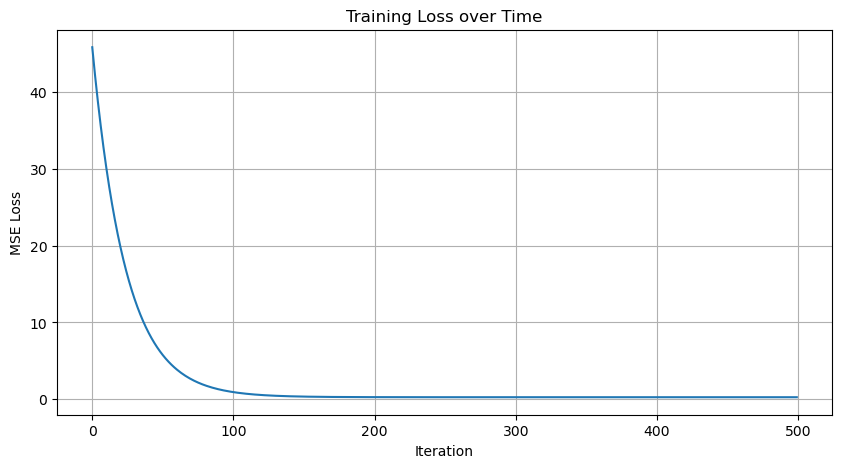

In [18]:
# Visualize the loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.show()

---
## Part 5: Feature Scaling

Gradient descent works much better when features are on similar scales. Let's see why and how to fix it.

This is statistical way to standarize any sameple of feature $i$ to a normal distribution:
$$X_i = \frac{x_i-\mu_i}{\sigma_i}$$
where $X_i$ is the column vector of raw data feature $i$

In [19]:
# Create data with very different scales
np.random.seed(42)
X_unscaled = np.column_stack([
    np.random.randn(500) * 1000,      # Feature 1: scale ~1000
    np.random.randn(500) * 0.001,     # Feature 2: scale ~0.001
    np.random.randn(500)              # Feature 3: scale ~1
])
y_unscaled = X_unscaled @ np.array([0.001, 1000, 1]) + 5 + np.random.randn(500) * 0.5

print(f"Feature ranges:")
for i in range(3):
    print(f"  Feature {i+1}: [{X_unscaled[:, i].min():.2f}, {X_unscaled[:, i].max():.2f}]")

Feature ranges:
  Feature 1: [-3241.27, 3852.73]
  Feature 2: [-0.00, 0.00]
  Feature 3: [-2.90, 2.60]


In [20]:
# This will likely fail or converge very slowly!
try:
    w_bad, b_bad, losses_bad = train_linear_regression(
        X_unscaled, y_unscaled, learning_rate=0.01, n_iterations=100
    )
except:
    print("Training failed due to numerical instability!")

Iteration    0 | Loss: 85.696115
Iteration   25 | Loss: 871155159202081111520571956442045941119879752400970050021201808697372616902517776369758662489941122009264930032502356888346629332618898026256512926205772115572748248142770935687381324059140750992520089259333243633664.000000
Iteration   50 | Loss: inf
Iteration   75 | Loss: nan
Iteration   99 | Loss: nan


C:\Users\theun\AppData\Local\Temp\ipykernel_40200\1286522444.py:16: RuntimeWarning: overflow encountered in square
  squared_error = error ** 2
c:\Users\theun\anaconda3\Lib\site-packages\numpy\_core\_methods.py:134: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\theun\AppData\Local\Temp\ipykernel_40200\2316166445.py:20: RuntimeWarning: overflow encountered in matmul
  grad_w = (2/ n_samples) * (X.T @ error)
C:\Users\theun\AppData\Local\Temp\ipykernel_40200\2316166445.py:20: RuntimeWarning: invalid value encountered in matmul
  grad_w = (2/ n_samples) * (X.T @ error)
c:\Users\theun\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\theun\AppData\Local\Temp\ipykernel_40200\2058285838.py:43: RuntimeWarning: invalid value encountered in subtract
  w = w - learning_rate * grad_w


### Task: Implement standardize function

In [21]:
# Solution: Standardization (Z-score normalization)
def standardize(X: np.ndarray) -> tuple:
    """
    Standardize features to have mean=0 and std=1.
    
    Returns:
        Tuple of (X_standardized, mean, std)
    """
    mean_column = np.mean(X, axis=0)
    std_column = np.std(X, axis=0)
    X_std = (X - mean_column) / std_column
    return X_std, mean_column, std_column

In [25]:
# Standardize and train
X_scaled, X_mean, X_std = standardize(X_unscaled)

print(f"Scaled feature ranges:")
for i in range(3):
    print(f"  Feature {i+1}: [{X_scaled[:, i].min():.2f}, {X_scaled[:, i].max():.2f}]")

w_good, b_good, losses_good = train_linear_regression(
    X_scaled, y_unscaled, learning_rate=0.01, n_iterations=500
)

Scaled feature ranges:
  Feature 1: [-3.31, 3.92]
  Feature 2: [-2.79, 2.66]
  Feature 3: [-2.98, 2.47]
Iteration    0 | Loss: 29.764856
Iteration   25 | Loss: 11.033700
Iteration   50 | Loss: 4.188505
Iteration   75 | Loss: 1.685461
Iteration  100 | Loss: 0.769650
Iteration  125 | Loss: 0.434379
Iteration  150 | Loss: 0.311569
Iteration  175 | Loss: 0.266558
Iteration  200 | Loss: 0.250052
Iteration  225 | Loss: 0.243995
Iteration  250 | Loss: 0.241771
Iteration  275 | Loss: 0.240954
Iteration  300 | Loss: 0.240654
Iteration  325 | Loss: 0.240543
Iteration  350 | Loss: 0.240502
Iteration  375 | Loss: 0.240488
Iteration  400 | Loss: 0.240482
Iteration  425 | Loss: 0.240480
Iteration  450 | Loss: 0.240479
Iteration  475 | Loss: 0.240479
Iteration  499 | Loss: 0.240479


---
# Tasks (Deadline: Sunday 30th Nov 2025)

Complete the following tasks to practice implementing gradient descent for linear regression.

## Task 1: Implement Mini-Batch Gradient Descent

Instead of using all samples in each iteration (batch gradient descent), implement **mini-batch gradient descent** which uses a random subset of samples.

Formally said, choose $X_b$ and its corresponding $y_b$ which is a subset of $row(X), row(y)$ to be trained for each iteration.


Benefits of mini-batch:
- Faster iterations
- Can escape local minima
- Better generalization

```python
# Expected usage:
w, b, losses = train_minibatch_gd(X, y, batch_size=32, learning_rate=0.01, n_iterations=1000)
```

In [ ]:
def train_minibatch_gd(
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 32,
    learning_rate: float = 0.01,
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step: int = 20,
) -> tuple:
    """
    Train linear regression using mini-batch gradient descent.
    
    Hints:
    - Use np.random.choice to select random indices
    - Compute gradients using only the selected samples
    """
    n_samples, n_features = X.shape
    
    # Initialize parameters randomly
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    loss_history = []
    
    # Use same code as in class.
    
    for i in range(n_iterations): 
        # calculate y_prediction
        y_prediction = predict(X, w, b)
        
        # calculate loss
        loss = compute_mse(y, y_prediction)
        loss_history.append(loss)
        
        # calculate gradient
        grad_w, grad_b = compute_gradients(X, y, y_prediction)
        
        # update weights and bias
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b
        
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")
    
    return w, b, loss_history

In [27]:
_, _, loss_history = train_minibatch_gd(
    X, y,
    batch_size=64,
    learning_rate=0.01,
    n_iterations=200,
    log_every_n_step=50
)

Iteration    0 | Loss: 45.884575
Iteration   50 | Loss: 5.747790
Iteration  100 | Loss: 0.925549
Iteration  150 | Loss: 0.343432
Iteration  199 | Loss: 0.273155


## Task 2: Implement Learning Rate Scheduling

Implement a training function that **decreases the learning rate** over time. This helps converge more precisely at the end of training.

Common schedules:
- Step decay: $\alpha_t = \alpha_0 \cdot 0.9^{\lfloor t/100 \rfloor}$
- Exponential decay: $\alpha_t = \alpha_0 \cdot e^{-kt}$
- Inverse time: $\alpha_t = \frac{\alpha_0}{1 + k \cdot t}$

where $t$ is number of current step/iteration and $k$ is the decay constant

In [38]:
def train_with_lr_schedule(
    X: np.ndarray,
    y: np.ndarray,
    initial_lr: float = 0.1,
    schedule: str = 'exponential',  # 'step', 'exponential', or 'inverse'
    n_iterations: int = 1000,
    decay_constant: float = 0.0001,
) -> tuple:
    """
    Train with learning rate scheduling.
    
    Implement at least one scheduling strategy.
    """
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    learning_rate = initial_lr
    loss_history = []
    
    def get_learning_rate(t: int) -> float:
        """Return learning rate at iteration t"""
        if schedule == 'step':
            # step decay = lr = lr0 * 0.9^(floor(t / 100))
            return initial_lr * (0.9 ** (t // 100))
        elif schedule == 'exponential':
            # expo decay = lr = lr0 * exp(-k * t)
            return initial_lr * np.exp(-decay_constant * t)
        elif schedule == 'inverse':
            # inverse time = lr = lr0 / (1 + k * t)
            return initial_lr / (1 + decay_constant * t)
        else:
            # error handling
            raise ValueError("Schedule must be step, exponential, or inverse.")
        
    for t in range(n_iterations):
        # Update LR
        learning_rate = get_learning_rate(t)
        
        # predictions
        y_prediction = predict(X, w, b)
        
        # loss
        loss = compute_mse(y, y_prediction)
        loss_history.append(loss)
        
        # gradients
        grad_w, grad_b = compute_gradients(X, y, y_prediction)
        
        # gradients with updated LR
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b
        
    return w, b, loss_history

In [44]:
# Test them all:
print("Step decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='step',
    n_iterations=500,
    decay_constant=0.01
)
print("final decay: ", loss_history[-1])

print("Exponential decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='exponential',
    n_iterations=500,
    decay_constant=0.01
)
print("final decay: ", loss_history[-1])

print("Inverse time decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='inverse',
    n_iterations=500,
    decay_constant=0.01
)
print("final decay: ", loss_history[-1])

Step decay:
final decay:  0.26285721163067477
Exponential decay:
final decay:  0.9458219532452796
Inverse time decay:
final decay:  0.2872568429148417


## Task 3: Add Regularization (Ridge Regression)

Implement **L2 regularization** (Ridge regression) to prevent overfitting.

The loss function becomes:
$$\mathcal{L} = \mathcal{L}_{MSE} + \lambda \sum w_i^2$$

The gradient for weights becomes:
$$\frac{\partial Loss}{\partial w} = \frac{\partial MSE}{\partial w} + 2\lambda w$$

where $\lambda$ is the regularization constant and $w_i$ is the weight value of corresponding feature $i$

In [52]:
def calculate_ridge_loss(y_true: np.ndarray, y_prediction: np.ndarray, w: np.ndarray, reg_lambda: float) -> float:
    """
    Compute Ridge regression loss (MSE + L2 regularization).
    
    Args:
        y_true: Actual target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength
    
    Returns:
        Ridge loss value
    """
    mse = compute_mse(y_true, y_prediction)
    l2_term = reg_lambda * np.sum(w ** 2)
    return mse + l2_term

def calculate_ridge_gradients(X: np.ndarray, y: np.ndarray, y_prediction: np.ndarray, w: np.ndarray, reg_lambda: float) -> tuple:
    """
    Compute gradients for Ridge regression.
    
    Args:
        X: Feature matrix
        y: True target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength
        """
    grad_w, grad_b = compute_gradients(X, y, y_prediction)
    
    # add l2 pnealty to grad_w
    grad_w += 2 * reg_lambda * w
    
    return grad_w, grad_b

def train_ridge_regression(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    reg_lambda: float = 0.1,  # Regularization strength
    n_iterations: int = 1000
) -> tuple:
    """
    Train linear regression with L2 regularization.
    """
    n_samples, n_features = X.shape
    y = y.reshape(-1)
    
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    loss_history = []
    
    for _ in range(n_iterations):
        # prediciton
        y_prediction = predict(X, w, b)
        
        # ridge loss
        loss = calculate_ridge_loss(y, y_prediction, w, reg_lambda)
        loss_history.append(loss)
        
        # ridge grad
        grad_w, grad_b = calculate_ridge_gradients(X, y, y_prediction, w, reg_lambda)
        
        # update w, b
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b
        
    return w, b, loss_history        

In [56]:
w_rigde, b_rigde, losses = train_ridge_regression(
    X, y,
    learning_rate=0.01,
    reg_lambda=0.1,
    n_iterations=500
)

print(train_ridge_regression(X, y, learning_rate=0.01, reg_lambda=0.1))

(array([ 1.82622314, -3.20131256,  1.32786329]), np.float64(5.01006630159851), [np.float64(45.77978616181906), np.float64(43.89063029237924), np.float64(42.08320433950511), np.float64(40.35396050297315), np.float64(38.69950546236967), np.float64(37.11659363182946), np.float64(35.6021207100524), np.float64(34.15311751264216), np.float64(32.766744074380625), np.float64(31.4402840095962), np.float64(30.17113911930514), np.float64(28.956824234302132), np.float64(27.794962283852694), np.float64(26.68327958009409), np.float64(25.61960130868697), np.float64(24.60184721667481), np.float64(23.628027488906113), np.float64(22.696238804753893), np.float64(21.804660567230002), np.float64(20.95155129693928), np.float64(20.135245183649957), np.float64(19.354148788574403), np.float64(18.606737890757078), np.float64(17.89155447125706), np.float64(17.207203829089178), np.float64(16.552351823153074), np.float64(15.92572223463277), np.float64(15.326094244591344), np.float64(14.752300021717117), np.float64

## Bonus Task: Implement Stochastic Gradient Descent (SGD)

Implement pure SGD where you update weights after **each individual sample** (batch_size=1).

Compare the convergence behavior of:
1. Batch GD (all samples)
2. Mini-batch GD (e.g., 32 samples)
3. SGD (1 sample)

Plot the loss curves for all three on the same graph.